### To run this notebook, please find the necessary files at https://github.com/palette-knife25/wgan-ddls

In [65]:
import numpy as np
import sklearn.datasets
import time
import random
import os

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import torch, torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torch import autograd

from utils import prepare_train_batches, prepare_swissroll_data, visualize_fake_data_projection
from wgan_fully_connected_models import Generator_fully_connected, Discriminator_fully_connected, 
                                         weights_init_1, weights_init_2
from wgan_train import train_wgan

In [25]:
path_to_save = './'
path_to_save_models = os.path.join(path_to_save, 'models')
if not os.path.exists(path_to_save_models):
    os.makedirs(path_to_save_models)
path_to_save_plots = os.path.join(path_to_save, 'plots')
if not os.path.exists(path_to_save_plots):
    os.makedirs(path_to_save_plots)

In [26]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_dataset_size = 100000
BATCH_SIZE = 256            
X_train = prepare_25gaussian_data(train_dataset_size)
X_train_batches = prepare_train_batches(X_train, BATCH_SIZE) 

In [27]:
X_train = prepare_swissroll_data(train_dataset_size)
X_train_batches = prepare_train_batches(X_train, BATCH_SIZE) 

#### Here we create our simple WGAN model and start train it on swiss roll dataset

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = Generator_fully_connected(n_dim = 2).to(device)
D = Discriminator_fully_connected().to(device)
G.apply(weights_init_2)
D.apply(weights_init_2)

Discriminator_fully_connected(
  (non_linear): ReLU()
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

In [29]:
lr_init = 1e-4
d_optimizer = torch.optim.Adam(D.parameters(), betas = (0.5, 0.9), lr = lr_init)
g_optimizer = torch.optim.Adam(G.parameters(), betas = (0.5, 0.9), lr = lr_init)
use_gradient_penalty = True
Lambda = 0.1
num_epochs = 20000
num_epoch_for_print = 100
num_epoch_for_save = 500
batch_size_sample = 5000   

Start to train WGAN
Start epoch = 0
Epoch 1 of 20000 took 0.566s
Discriminator last mean loss: 	-4.602979
Generator last mean loss: 	1.493062
Start epoch = 100
Epoch 101 of 20000 took 0.055s
Discriminator last mean loss: 	-0.267160
Generator last mean loss: 	0.278398
Start epoch = 200
Epoch 201 of 20000 took 0.054s
Discriminator last mean loss: 	-0.185926
Generator last mean loss: 	-0.036732
Start epoch = 300
Epoch 301 of 20000 took 0.054s
Discriminator last mean loss: 	-0.123653
Generator last mean loss: 	-0.220862
Start epoch = 400
Epoch 401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.115380
Generator last mean loss: 	-0.284937
Start epoch = 500
Epoch 501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.081206
Generator last mean loss: 	0.016147
Start epoch = 600
Epoch 601 of 20000 took 0.057s
Discriminator last mean loss: 	-0.093409
Generator last mean loss: 	-0.431778
Start epoch = 700
Epoch 701 of 20000 took 0.057s
Discriminator last mean loss: 	-0.061329
Generato

/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 5100
Epoch 5101 of 20000 took 0.059s
Discriminator last mean loss: 	-0.028590
Generator last mean loss: 	0.711582
Start epoch = 5200
Epoch 5201 of 20000 took 0.061s
Discriminator last mean loss: 	-0.028176
Generator last mean loss: 	0.278244
Start epoch = 5300
Epoch 5301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.018878
Generator last mean loss: 	1.049637
Start epoch = 5400
Epoch 5401 of 20000 took 0.055s
Discriminator last mean loss: 	-0.026256
Generator last mean loss: 	1.273137
Start epoch = 5500
Epoch 5501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.036072
Generator last mean loss: 	1.445935


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 5600
Epoch 5601 of 20000 took 0.055s
Discriminator last mean loss: 	-0.017707
Generator last mean loss: 	0.936239
Start epoch = 5700
Epoch 5701 of 20000 took 0.055s
Discriminator last mean loss: 	-0.007858
Generator last mean loss: 	1.177732
Start epoch = 5800
Epoch 5801 of 20000 took 0.056s
Discriminator last mean loss: 	-0.027143
Generator last mean loss: 	2.658493
Start epoch = 5900
Epoch 5901 of 20000 took 0.059s
Discriminator last mean loss: 	0.048118
Generator last mean loss: 	2.062648
Start epoch = 6000
Epoch 6001 of 20000 took 0.056s
Discriminator last mean loss: 	-0.047241
Generator last mean loss: 	0.840812


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 6100
Epoch 6101 of 20000 took 0.056s
Discriminator last mean loss: 	-0.016077
Generator last mean loss: 	0.229510
Start epoch = 6200
Epoch 6201 of 20000 took 0.055s
Discriminator last mean loss: 	-0.020670
Generator last mean loss: 	1.010335
Start epoch = 6300
Epoch 6301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.049760
Generator last mean loss: 	0.038679
Start epoch = 6400
Epoch 6401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.011361
Generator last mean loss: 	0.712111
Start epoch = 6500
Epoch 6501 of 20000 took 0.056s
Discriminator last mean loss: 	0.041737
Generator last mean loss: 	1.778003


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 6600
Epoch 6601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.015629
Generator last mean loss: 	0.967841
Start epoch = 6700
Epoch 6701 of 20000 took 0.056s
Discriminator last mean loss: 	-0.019002
Generator last mean loss: 	1.078873
Start epoch = 6800
Epoch 6801 of 20000 took 0.056s
Discriminator last mean loss: 	-0.038562
Generator last mean loss: 	1.231625
Start epoch = 6900
Epoch 6901 of 20000 took 0.056s
Discriminator last mean loss: 	-0.026166
Generator last mean loss: 	0.888379
Start epoch = 7000
Epoch 7001 of 20000 took 0.056s
Discriminator last mean loss: 	0.013845
Generator last mean loss: 	1.245685


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 7100
Epoch 7101 of 20000 took 0.056s
Discriminator last mean loss: 	-0.029418
Generator last mean loss: 	-0.309125
Start epoch = 7200
Epoch 7201 of 20000 took 0.069s
Discriminator last mean loss: 	-0.005517
Generator last mean loss: 	0.640555
Start epoch = 7300
Epoch 7301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.041302
Generator last mean loss: 	2.850950
Start epoch = 7400
Epoch 7401 of 20000 took 0.059s
Discriminator last mean loss: 	-0.044107
Generator last mean loss: 	0.451498
Start epoch = 7500
Epoch 7501 of 20000 took 0.060s
Discriminator last mean loss: 	-0.024887
Generator last mean loss: 	0.873744


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 7600
Epoch 7601 of 20000 took 0.055s
Discriminator last mean loss: 	-0.039313
Generator last mean loss: 	1.583206
Start epoch = 7700
Epoch 7701 of 20000 took 0.055s
Discriminator last mean loss: 	-0.018051
Generator last mean loss: 	1.210798
Start epoch = 7800
Epoch 7801 of 20000 took 0.055s
Discriminator last mean loss: 	-0.040990
Generator last mean loss: 	1.426245
Start epoch = 7900
Epoch 7901 of 20000 took 0.056s
Discriminator last mean loss: 	-0.046191
Generator last mean loss: 	0.985869
Start epoch = 8000
Epoch 8001 of 20000 took 0.064s
Discriminator last mean loss: 	-0.025676
Generator last mean loss: 	0.615289


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 8100
Epoch 8101 of 20000 took 0.055s
Discriminator last mean loss: 	-0.026861
Generator last mean loss: 	0.300817
Start epoch = 8200
Epoch 8201 of 20000 took 0.056s
Discriminator last mean loss: 	-0.033558
Generator last mean loss: 	-0.630792
Start epoch = 8300
Epoch 8301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.037524
Generator last mean loss: 	2.577478
Start epoch = 8400
Epoch 8401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.024969
Generator last mean loss: 	0.755142
Start epoch = 8500
Epoch 8501 of 20000 took 0.057s
Discriminator last mean loss: 	-0.019936
Generator last mean loss: 	0.136009


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 8600
Epoch 8601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.061674
Generator last mean loss: 	0.266263
Start epoch = 8700
Epoch 8701 of 20000 took 0.065s
Discriminator last mean loss: 	-0.024668
Generator last mean loss: 	0.411042
Start epoch = 8800
Epoch 8801 of 20000 took 0.056s
Discriminator last mean loss: 	-0.031524
Generator last mean loss: 	0.432775
Start epoch = 8900
Epoch 8901 of 20000 took 0.057s
Discriminator last mean loss: 	-0.054593
Generator last mean loss: 	1.663706
Start epoch = 9000
Epoch 9001 of 20000 took 0.057s
Discriminator last mean loss: 	0.006290
Generator last mean loss: 	1.147438


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 9100
Epoch 9101 of 20000 took 0.063s
Discriminator last mean loss: 	-0.018866
Generator last mean loss: 	1.641263
Start epoch = 9200
Epoch 9201 of 20000 took 0.057s
Discriminator last mean loss: 	-0.026052
Generator last mean loss: 	1.105053
Start epoch = 9300
Epoch 9301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.010444
Generator last mean loss: 	0.921559
Start epoch = 9400
Epoch 9401 of 20000 took 0.059s
Discriminator last mean loss: 	-0.025528
Generator last mean loss: 	1.603227
Start epoch = 9500
Epoch 9501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.028414
Generator last mean loss: 	1.271450


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 9600
Epoch 9601 of 20000 took 0.065s
Discriminator last mean loss: 	-0.049263
Generator last mean loss: 	-0.401226
Start epoch = 9700
Epoch 9701 of 20000 took 0.055s
Discriminator last mean loss: 	0.018463
Generator last mean loss: 	-0.045503
Start epoch = 9800
Epoch 9801 of 20000 took 0.064s
Discriminator last mean loss: 	-0.028852
Generator last mean loss: 	-0.004264
Start epoch = 9900
Epoch 9901 of 20000 took 0.055s
Discriminator last mean loss: 	-0.013463
Generator last mean loss: 	0.727925
Start epoch = 10000
Epoch 10001 of 20000 took 0.056s
Discriminator last mean loss: 	-0.012928
Generator last mean loss: 	-0.109256


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 10100
Epoch 10101 of 20000 took 0.056s
Discriminator last mean loss: 	0.001968
Generator last mean loss: 	0.338818
Start epoch = 10200
Epoch 10201 of 20000 took 0.055s
Discriminator last mean loss: 	-0.022071
Generator last mean loss: 	0.023165
Start epoch = 10300
Epoch 10301 of 20000 took 0.055s
Discriminator last mean loss: 	-0.019834
Generator last mean loss: 	-0.821402
Start epoch = 10400
Epoch 10401 of 20000 took 0.055s
Discriminator last mean loss: 	-0.034257
Generator last mean loss: 	0.017212
Start epoch = 10500
Epoch 10501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.005971
Generator last mean loss: 	0.298535


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 10600
Epoch 10601 of 20000 took 0.055s
Discriminator last mean loss: 	-0.013578
Generator last mean loss: 	0.539935
Start epoch = 10700
Epoch 10701 of 20000 took 0.055s
Discriminator last mean loss: 	-0.014212
Generator last mean loss: 	-0.060368
Start epoch = 10800
Epoch 10801 of 20000 took 0.062s
Discriminator last mean loss: 	-0.022574
Generator last mean loss: 	-0.342817
Start epoch = 10900
Epoch 10901 of 20000 took 0.062s
Discriminator last mean loss: 	-0.008767
Generator last mean loss: 	0.508311
Start epoch = 11000
Epoch 11001 of 20000 took 0.058s
Discriminator last mean loss: 	-0.023623
Generator last mean loss: 	0.386599


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 11100
Epoch 11101 of 20000 took 0.058s
Discriminator last mean loss: 	-0.016187
Generator last mean loss: 	0.203442
Start epoch = 11200
Epoch 11201 of 20000 took 0.059s
Discriminator last mean loss: 	0.002115
Generator last mean loss: 	-0.421277
Start epoch = 11300
Epoch 11301 of 20000 took 0.057s
Discriminator last mean loss: 	-0.010979
Generator last mean loss: 	0.307477
Start epoch = 11400
Epoch 11401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.033515
Generator last mean loss: 	0.174321
Start epoch = 11500
Epoch 11501 of 20000 took 0.056s
Discriminator last mean loss: 	0.005452
Generator last mean loss: 	-0.117000


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 11600
Epoch 11601 of 20000 took 0.057s
Discriminator last mean loss: 	-0.028430
Generator last mean loss: 	-0.967309
Start epoch = 11700
Epoch 11701 of 20000 took 0.057s
Discriminator last mean loss: 	-0.017927
Generator last mean loss: 	0.185759
Start epoch = 11800
Epoch 11801 of 20000 took 0.059s
Discriminator last mean loss: 	-0.032412
Generator last mean loss: 	-0.775410
Start epoch = 11900
Epoch 11901 of 20000 took 0.055s
Discriminator last mean loss: 	0.006741
Generator last mean loss: 	0.082819
Start epoch = 12000
Epoch 12001 of 20000 took 0.068s
Discriminator last mean loss: 	-0.002882
Generator last mean loss: 	-1.068965


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 12100
Epoch 12101 of 20000 took 0.056s
Discriminator last mean loss: 	-0.041102
Generator last mean loss: 	-1.105352
Start epoch = 12200
Epoch 12201 of 20000 took 0.057s
Discriminator last mean loss: 	-0.009336
Generator last mean loss: 	-0.945233
Start epoch = 12300
Epoch 12301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.001116
Generator last mean loss: 	-0.480884
Start epoch = 12400
Epoch 12401 of 20000 took 0.056s
Discriminator last mean loss: 	0.002602
Generator last mean loss: 	-1.143897
Start epoch = 12500
Epoch 12501 of 20000 took 0.056s
Discriminator last mean loss: 	0.004222
Generator last mean loss: 	-0.517196


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 12600
Epoch 12601 of 20000 took 0.056s
Discriminator last mean loss: 	0.005632
Generator last mean loss: 	-1.402767
Start epoch = 12700
Epoch 12701 of 20000 took 0.056s
Discriminator last mean loss: 	-0.022107
Generator last mean loss: 	-0.814926
Start epoch = 12800
Epoch 12801 of 20000 took 0.056s
Discriminator last mean loss: 	0.004333
Generator last mean loss: 	-0.800590
Start epoch = 12900
Epoch 12901 of 20000 took 0.056s
Discriminator last mean loss: 	-0.004459
Generator last mean loss: 	-0.491360
Start epoch = 13000
Epoch 13001 of 20000 took 0.057s
Discriminator last mean loss: 	-0.044372
Generator last mean loss: 	-0.055970


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 13100
Epoch 13101 of 20000 took 0.055s
Discriminator last mean loss: 	-0.046943
Generator last mean loss: 	-0.828245
Start epoch = 13200
Epoch 13201 of 20000 took 0.055s
Discriminator last mean loss: 	0.004409
Generator last mean loss: 	-1.132776
Start epoch = 13300
Epoch 13301 of 20000 took 0.057s
Discriminator last mean loss: 	-0.024305
Generator last mean loss: 	-0.598711
Start epoch = 13400
Epoch 13401 of 20000 took 0.057s
Discriminator last mean loss: 	0.002534
Generator last mean loss: 	-1.196838
Start epoch = 13500
Epoch 13501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.009645
Generator last mean loss: 	-1.371547


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 13600
Epoch 13601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.024377
Generator last mean loss: 	-0.687444
Start epoch = 13700
Epoch 13701 of 20000 took 0.056s
Discriminator last mean loss: 	0.007207
Generator last mean loss: 	-1.009767
Start epoch = 13800
Epoch 13801 of 20000 took 0.060s
Discriminator last mean loss: 	-0.019416
Generator last mean loss: 	-1.143730
Start epoch = 13900
Epoch 13901 of 20000 took 0.056s
Discriminator last mean loss: 	0.024005
Generator last mean loss: 	-1.258321
Start epoch = 14000
Epoch 14001 of 20000 took 0.056s
Discriminator last mean loss: 	-0.015909
Generator last mean loss: 	-1.521516


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 14100
Epoch 14101 of 20000 took 0.060s
Discriminator last mean loss: 	-0.017810
Generator last mean loss: 	-0.465677
Start epoch = 14200
Epoch 14201 of 20000 took 0.056s
Discriminator last mean loss: 	-0.001001
Generator last mean loss: 	-0.117379
Start epoch = 14300
Epoch 14301 of 20000 took 0.060s
Discriminator last mean loss: 	-0.005045
Generator last mean loss: 	-0.949686
Start epoch = 14400
Epoch 14401 of 20000 took 0.063s
Discriminator last mean loss: 	-0.006181
Generator last mean loss: 	-0.910866
Start epoch = 14500
Epoch 14501 of 20000 took 0.058s
Discriminator last mean loss: 	-0.010369
Generator last mean loss: 	-2.653745


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 14600
Epoch 14601 of 20000 took 0.057s
Discriminator last mean loss: 	-0.005428
Generator last mean loss: 	-1.698565
Start epoch = 14700
Epoch 14701 of 20000 took 0.058s
Discriminator last mean loss: 	-0.002009
Generator last mean loss: 	-1.401094
Start epoch = 14800
Epoch 14801 of 20000 took 0.058s
Discriminator last mean loss: 	0.006647
Generator last mean loss: 	-1.398404
Start epoch = 14900
Epoch 14901 of 20000 took 0.062s
Discriminator last mean loss: 	0.016038
Generator last mean loss: 	0.132873
Start epoch = 15000
Epoch 15001 of 20000 took 0.057s
Discriminator last mean loss: 	-0.023407
Generator last mean loss: 	-1.638920


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 15100
Epoch 15101 of 20000 took 0.057s
Discriminator last mean loss: 	-0.005480
Generator last mean loss: 	-1.681496
Start epoch = 15200
Epoch 15201 of 20000 took 0.057s
Discriminator last mean loss: 	0.005615
Generator last mean loss: 	-2.114043
Start epoch = 15300
Epoch 15301 of 20000 took 0.057s
Discriminator last mean loss: 	0.001129
Generator last mean loss: 	-1.354766
Start epoch = 15400
Epoch 15401 of 20000 took 0.055s
Discriminator last mean loss: 	-0.023469
Generator last mean loss: 	-1.699631
Start epoch = 15500
Epoch 15501 of 20000 took 0.058s
Discriminator last mean loss: 	-0.012875
Generator last mean loss: 	-0.502893


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 15600
Epoch 15601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.008548
Generator last mean loss: 	-1.669972
Start epoch = 15700
Epoch 15701 of 20000 took 0.070s
Discriminator last mean loss: 	-0.021701
Generator last mean loss: 	-1.207142
Start epoch = 15800
Epoch 15801 of 20000 took 0.055s
Discriminator last mean loss: 	-0.014941
Generator last mean loss: 	-1.510179
Start epoch = 15900
Epoch 15901 of 20000 took 0.056s
Discriminator last mean loss: 	-0.001475
Generator last mean loss: 	-0.642259
Start epoch = 16000
Epoch 16001 of 20000 took 0.062s
Discriminator last mean loss: 	-0.003575
Generator last mean loss: 	-0.534846


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 16100
Epoch 16101 of 20000 took 0.057s
Discriminator last mean loss: 	0.012964
Generator last mean loss: 	-1.942352
Start epoch = 16200
Epoch 16201 of 20000 took 0.056s
Discriminator last mean loss: 	-0.012445
Generator last mean loss: 	-2.358748
Start epoch = 16300
Epoch 16301 of 20000 took 0.056s
Discriminator last mean loss: 	0.008127
Generator last mean loss: 	-2.665736
Start epoch = 16400
Epoch 16401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.028263
Generator last mean loss: 	-3.743928
Start epoch = 16500
Epoch 16501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.026991
Generator last mean loss: 	-1.744162


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 16600
Epoch 16601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.014886
Generator last mean loss: 	-1.477326
Start epoch = 16700
Epoch 16701 of 20000 took 0.059s
Discriminator last mean loss: 	0.001983
Generator last mean loss: 	-1.278629
Start epoch = 16800
Epoch 16801 of 20000 took 0.057s
Discriminator last mean loss: 	-0.026383
Generator last mean loss: 	-2.228253
Start epoch = 16900
Epoch 16901 of 20000 took 0.057s
Discriminator last mean loss: 	-0.001489
Generator last mean loss: 	-0.864620
Start epoch = 17000
Epoch 17001 of 20000 took 0.061s
Discriminator last mean loss: 	0.001992
Generator last mean loss: 	-3.377393


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 17100
Epoch 17101 of 20000 took 0.057s
Discriminator last mean loss: 	0.001483
Generator last mean loss: 	-0.799743
Start epoch = 17200
Epoch 17201 of 20000 took 0.062s
Discriminator last mean loss: 	-0.007594
Generator last mean loss: 	-1.838919
Start epoch = 17300
Epoch 17301 of 20000 took 0.056s
Discriminator last mean loss: 	0.008989
Generator last mean loss: 	-2.436639
Start epoch = 17400
Epoch 17401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.019646
Generator last mean loss: 	0.113851
Start epoch = 17500
Epoch 17501 of 20000 took 0.057s
Discriminator last mean loss: 	0.016821
Generator last mean loss: 	-1.220709


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 17600
Epoch 17601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.000470
Generator last mean loss: 	-1.780293
Start epoch = 17700
Epoch 17701 of 20000 took 0.056s
Discriminator last mean loss: 	-0.006357
Generator last mean loss: 	-1.474833
Start epoch = 17800
Epoch 17801 of 20000 took 0.059s
Discriminator last mean loss: 	-0.006814
Generator last mean loss: 	-2.675579
Start epoch = 17900
Epoch 17901 of 20000 took 0.065s
Discriminator last mean loss: 	0.004111
Generator last mean loss: 	-1.788841
Start epoch = 18000
Epoch 18001 of 20000 took 0.056s
Discriminator last mean loss: 	0.026328
Generator last mean loss: 	-0.984015


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 18100
Epoch 18101 of 20000 took 0.056s
Discriminator last mean loss: 	-0.005181
Generator last mean loss: 	-0.507991
Start epoch = 18200
Epoch 18201 of 20000 took 0.056s
Discriminator last mean loss: 	-0.011516
Generator last mean loss: 	-3.069427
Start epoch = 18300
Epoch 18301 of 20000 took 0.056s
Discriminator last mean loss: 	-0.010973
Generator last mean loss: 	-1.971163
Start epoch = 18400
Epoch 18401 of 20000 took 0.056s
Discriminator last mean loss: 	-0.030921
Generator last mean loss: 	-1.779188
Start epoch = 18500
Epoch 18501 of 20000 took 0.056s
Discriminator last mean loss: 	-0.016641
Generator last mean loss: 	-1.534812


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 18600
Epoch 18601 of 20000 took 0.055s
Discriminator last mean loss: 	0.004160
Generator last mean loss: 	-0.889714
Start epoch = 18700
Epoch 18701 of 20000 took 0.055s
Discriminator last mean loss: 	0.023817
Generator last mean loss: 	-1.085434
Start epoch = 18800
Epoch 18801 of 20000 took 0.057s
Discriminator last mean loss: 	-0.013112
Generator last mean loss: 	-0.972126
Start epoch = 18900
Epoch 18901 of 20000 took 0.056s
Discriminator last mean loss: 	-0.017694
Generator last mean loss: 	-0.061258
Start epoch = 19000
Epoch 19001 of 20000 took 0.060s
Discriminator last mean loss: 	-0.029437
Generator last mean loss: 	-1.588338


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 19100
Epoch 19101 of 20000 took 0.056s
Discriminator last mean loss: 	0.032101
Generator last mean loss: 	-2.328574
Start epoch = 19200
Epoch 19201 of 20000 took 0.056s
Discriminator last mean loss: 	0.004250
Generator last mean loss: 	-0.795221
Start epoch = 19300
Epoch 19301 of 20000 took 0.056s
Discriminator last mean loss: 	0.018405
Generator last mean loss: 	-0.395355
Start epoch = 19400
Epoch 19401 of 20000 took 0.057s
Discriminator last mean loss: 	-0.011161
Generator last mean loss: 	-2.561004
Start epoch = 19500
Epoch 19501 of 20000 took 0.057s
Discriminator last mean loss: 	0.009099
Generator last mean loss: 	-1.293094


/workspace/Wgan/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/workspace/Wgan/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 19600
Epoch 19601 of 20000 took 0.056s
Discriminator last mean loss: 	-0.043086
Generator last mean loss: 	-2.097264
Start epoch = 19700
Epoch 19701 of 20000 took 0.062s
Discriminator last mean loss: 	-0.009191
Generator last mean loss: 	-0.382976
Start epoch = 19800
Epoch 19801 of 20000 took 0.057s
Discriminator last mean loss: 	-0.007676
Generator last mean loss: 	-1.935795
Start epoch = 19900
Epoch 19901 of 20000 took 0.066s
Discriminator last mean loss: 	-0.009407
Generator last mean loss: 	-0.227865


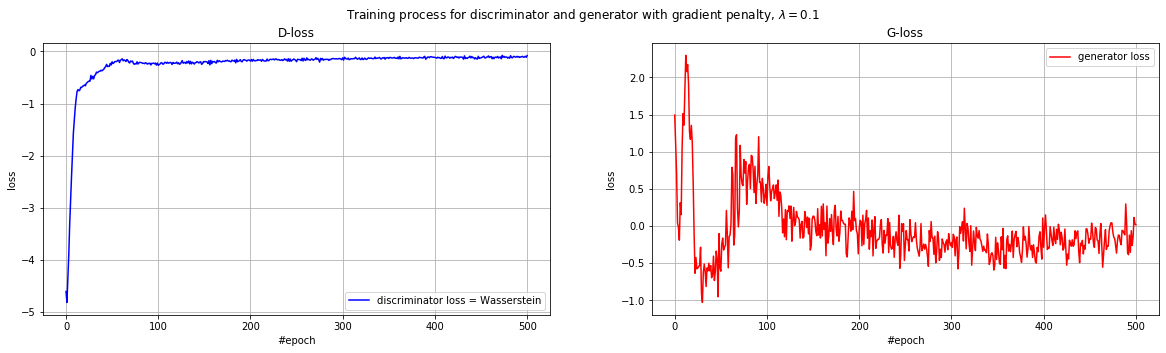

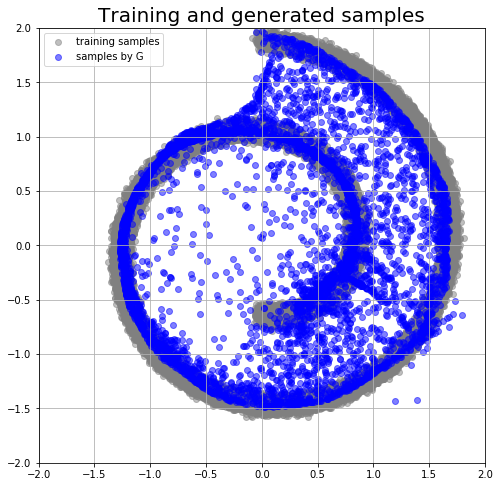

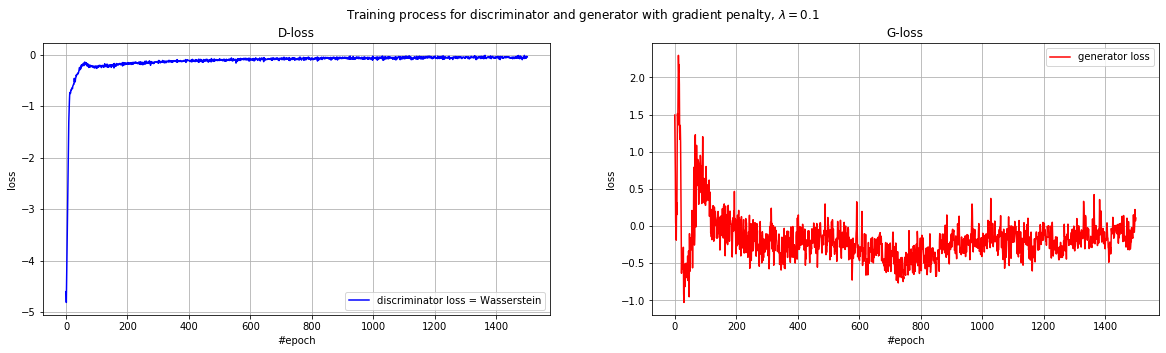

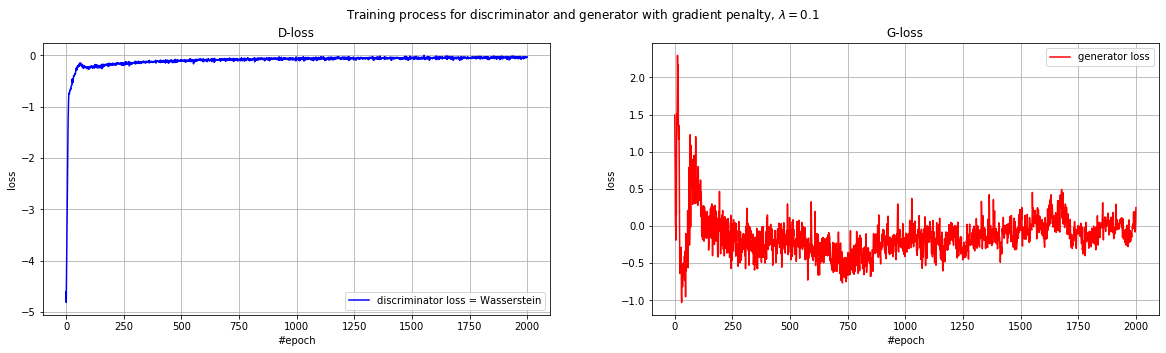

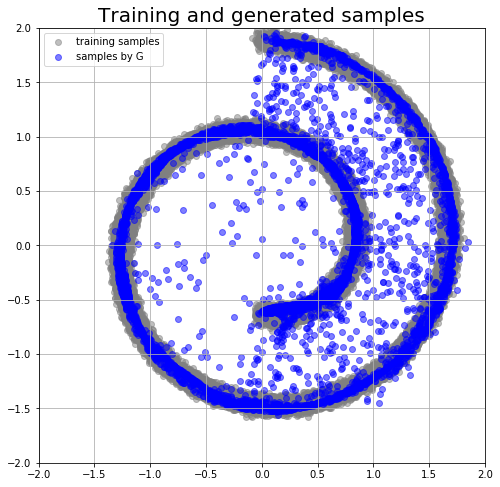

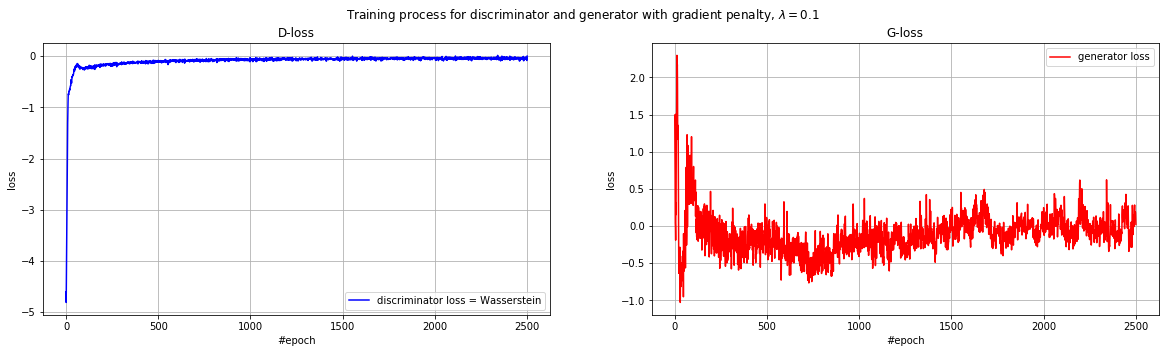

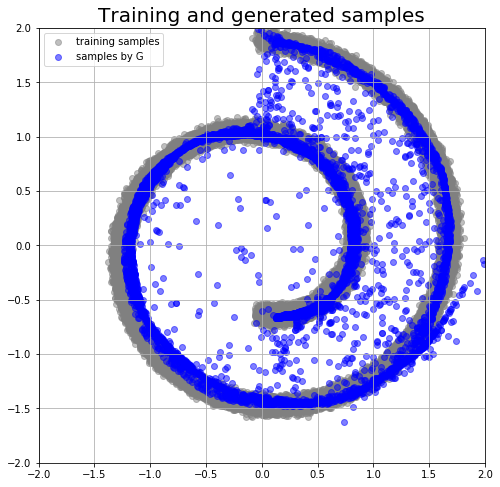

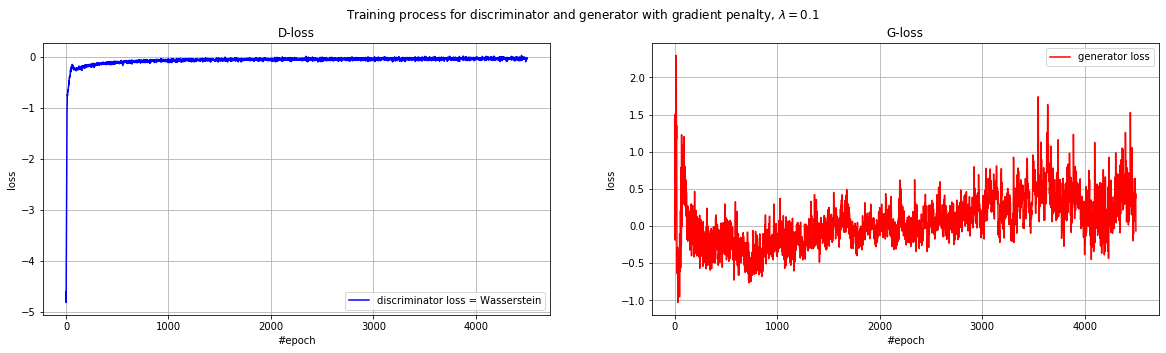

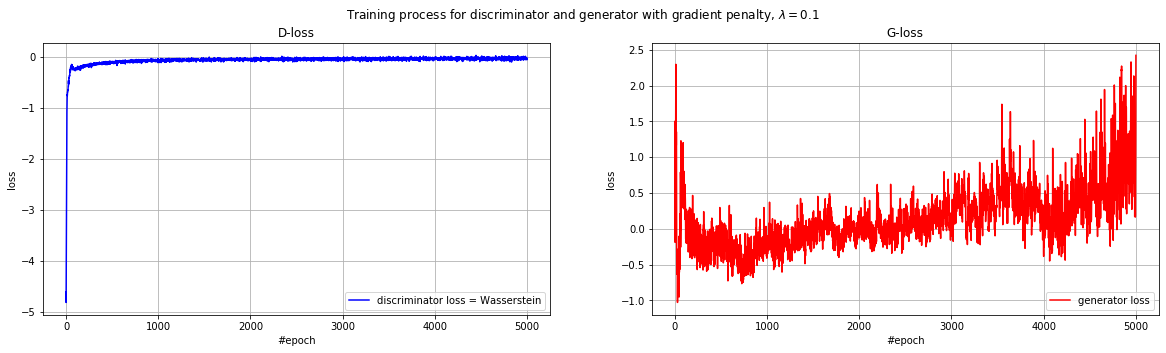

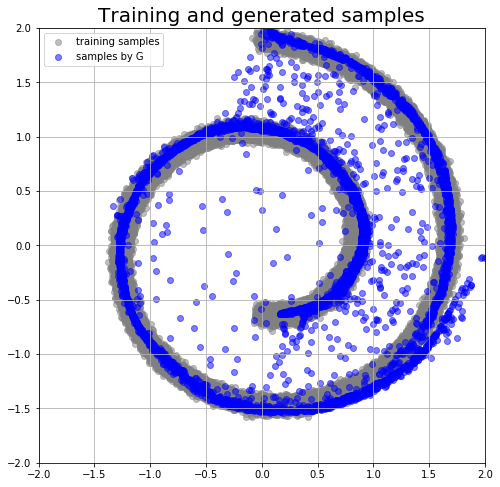

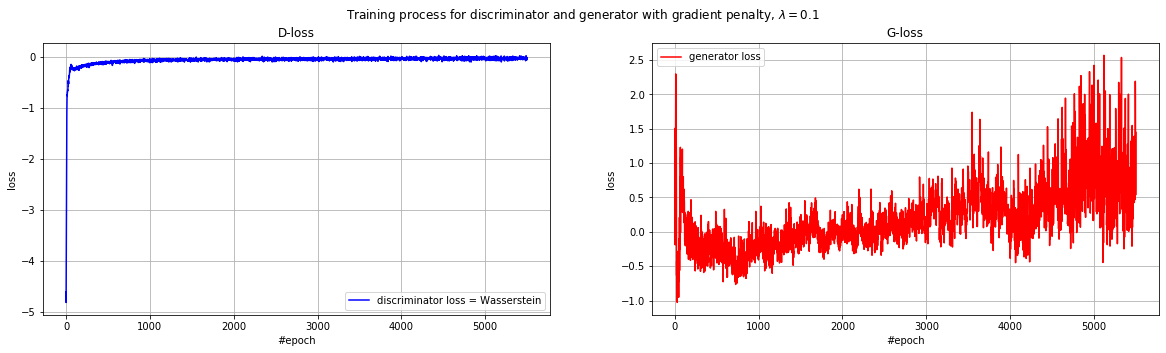

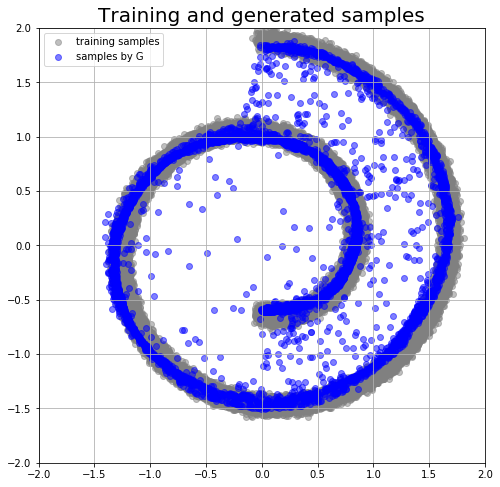

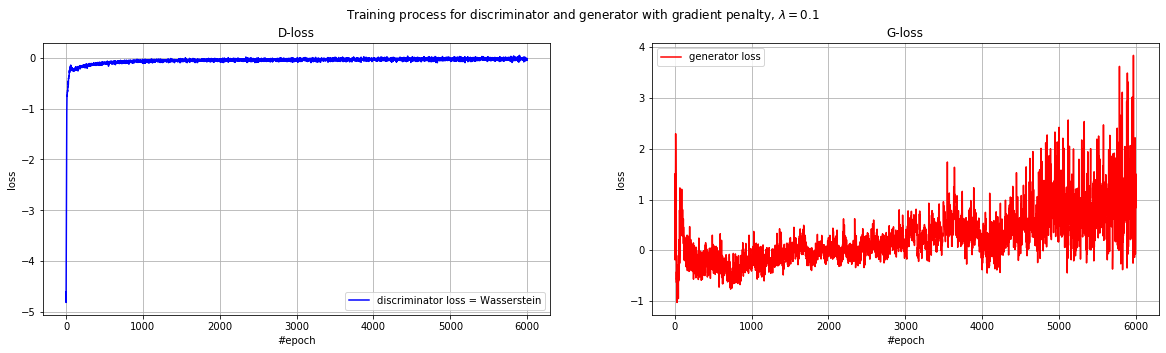

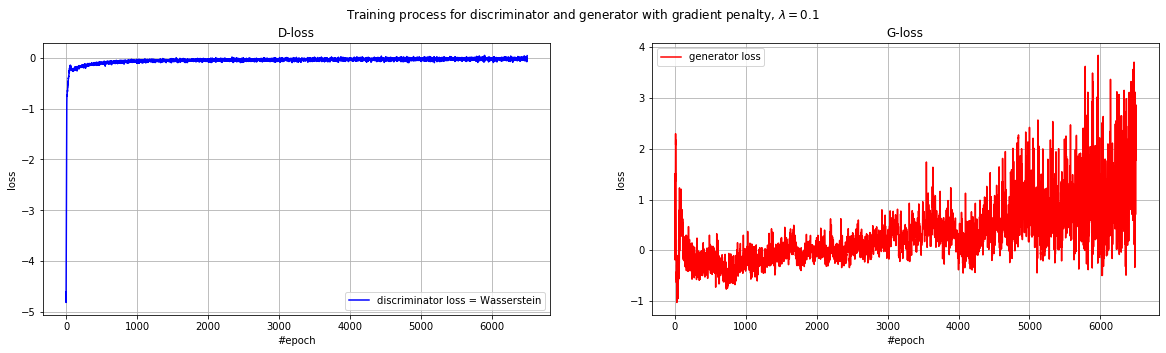

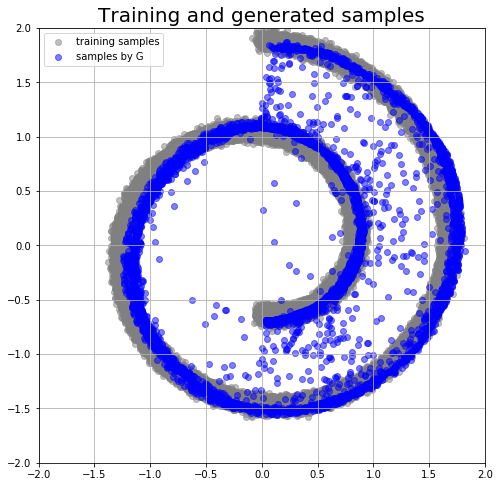

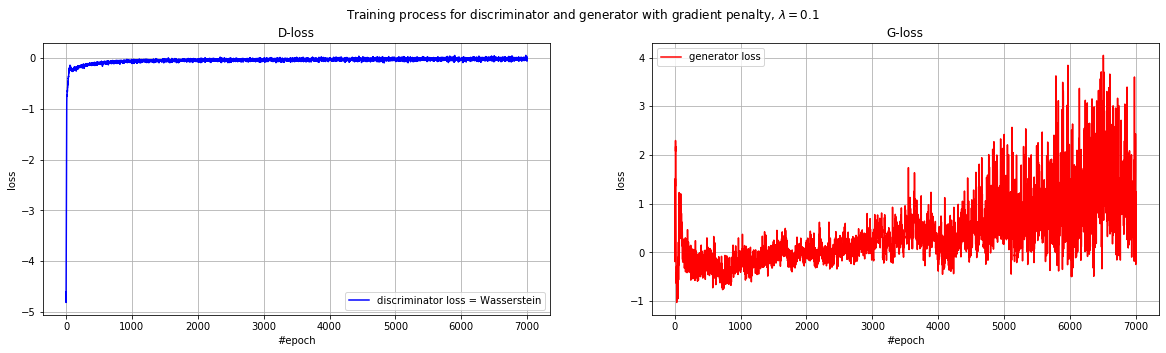

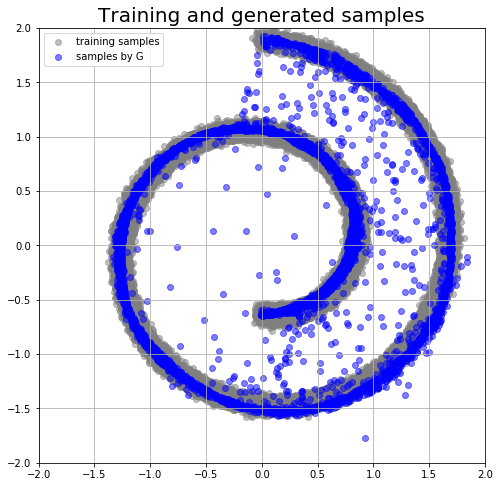

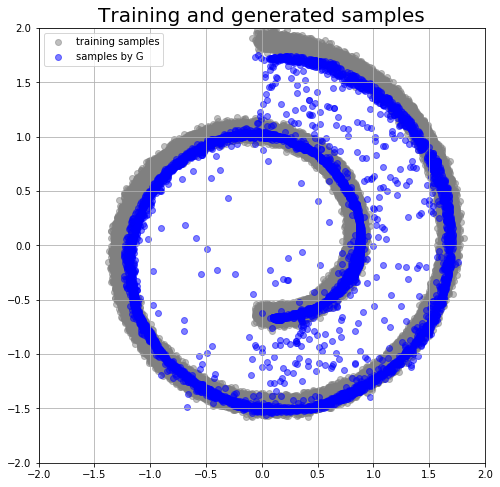

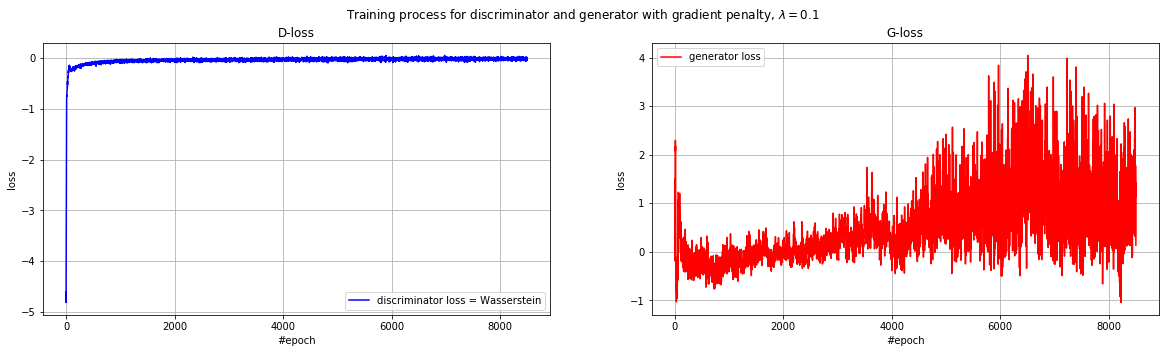

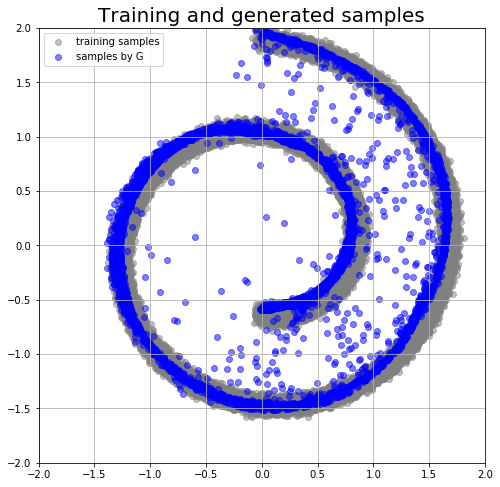

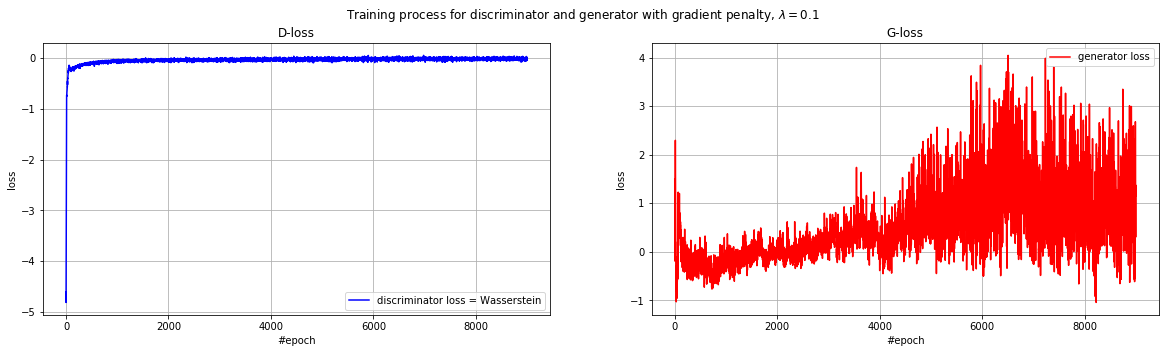

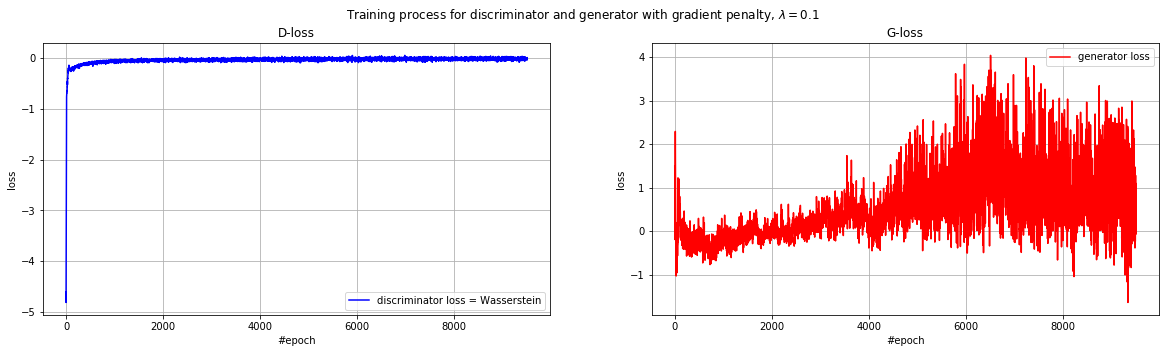

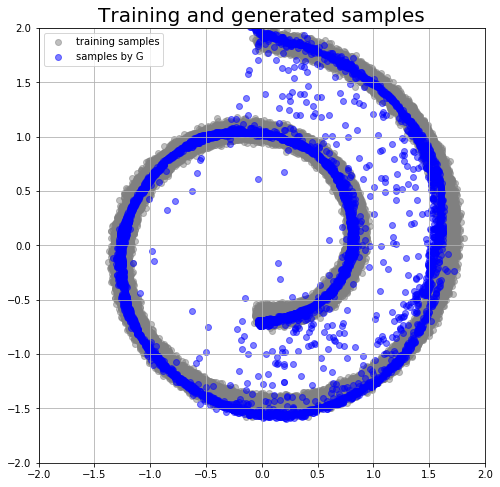

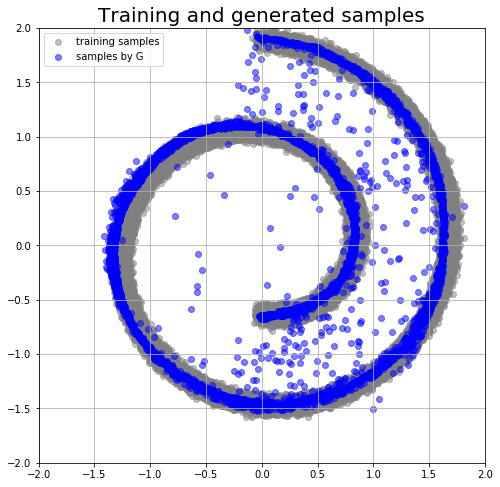

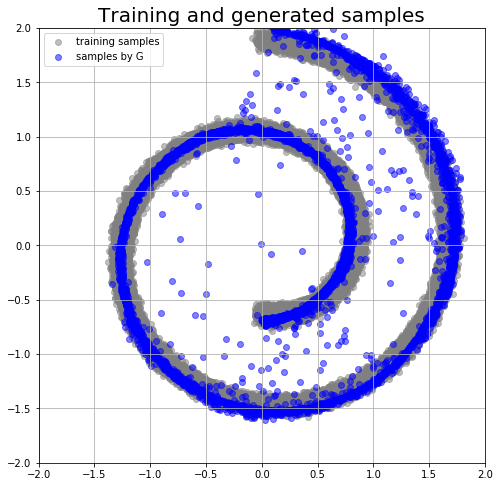

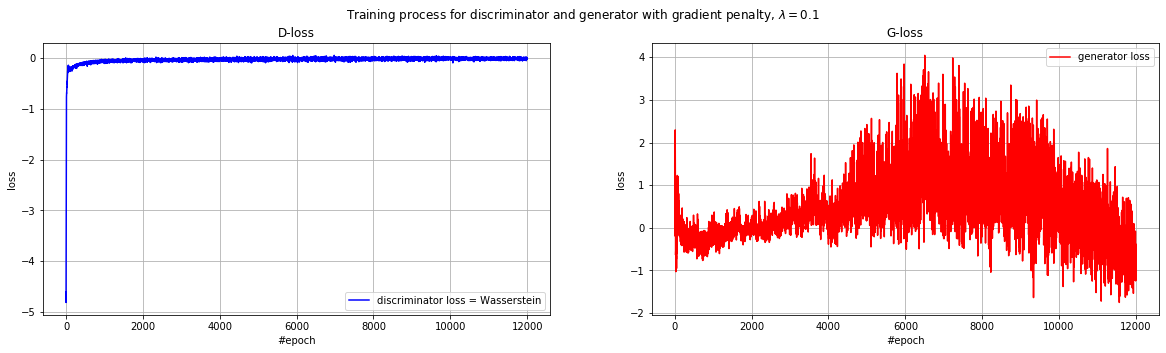

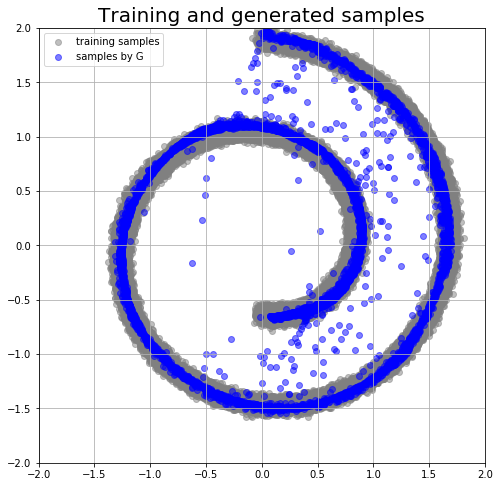

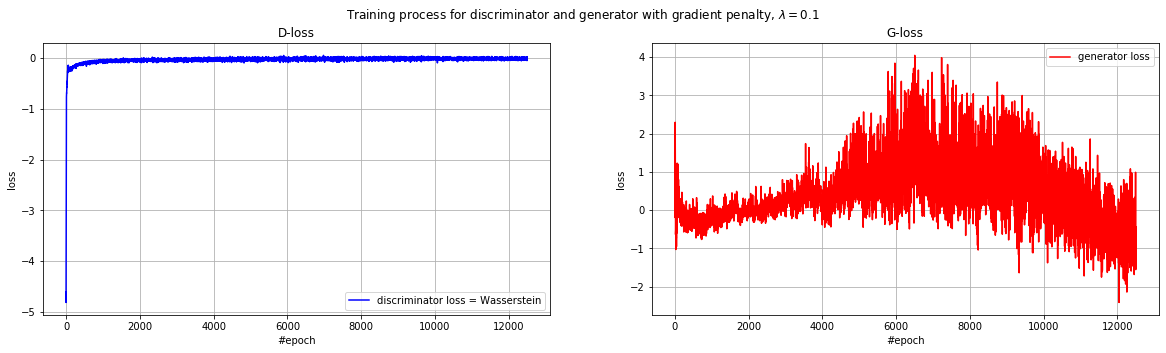

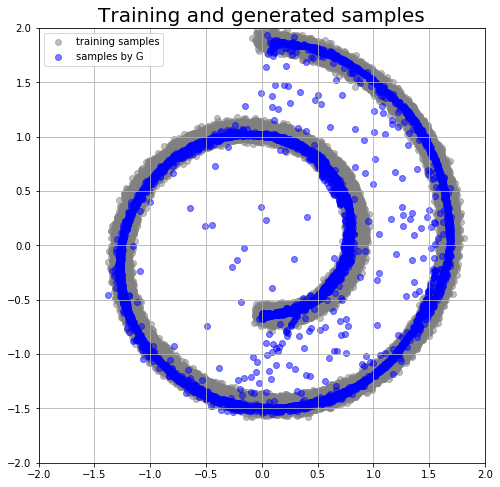

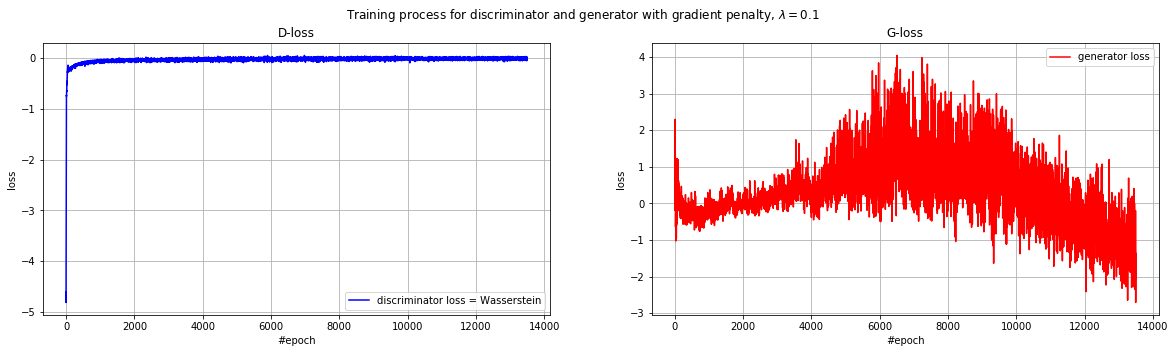

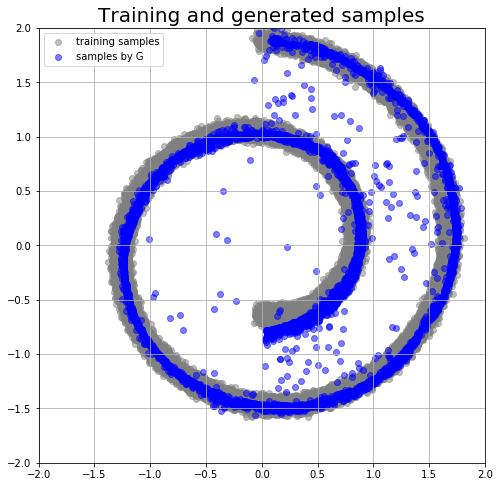

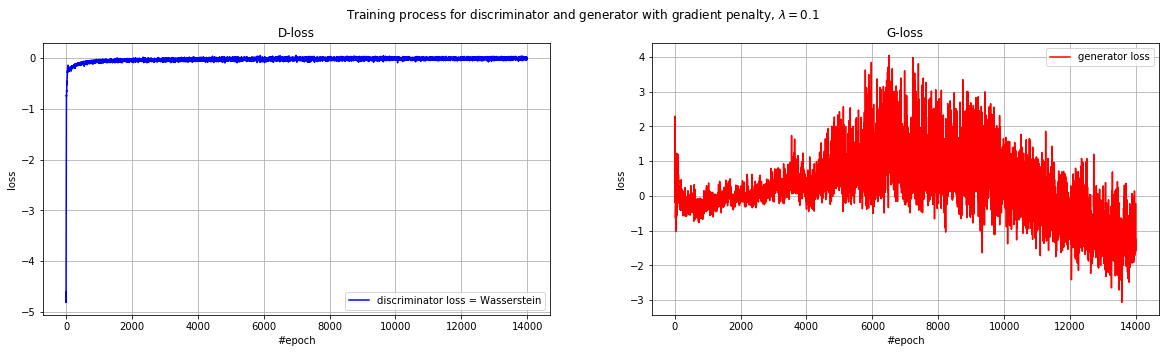

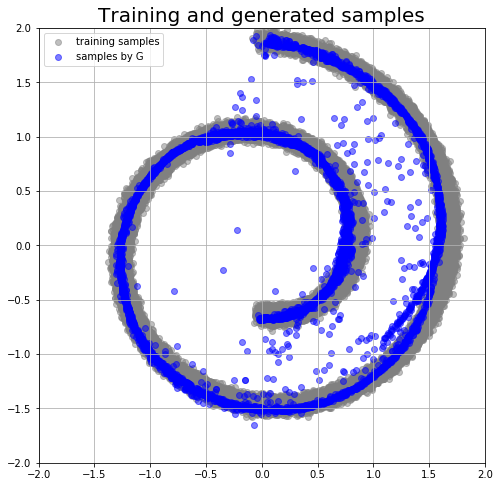

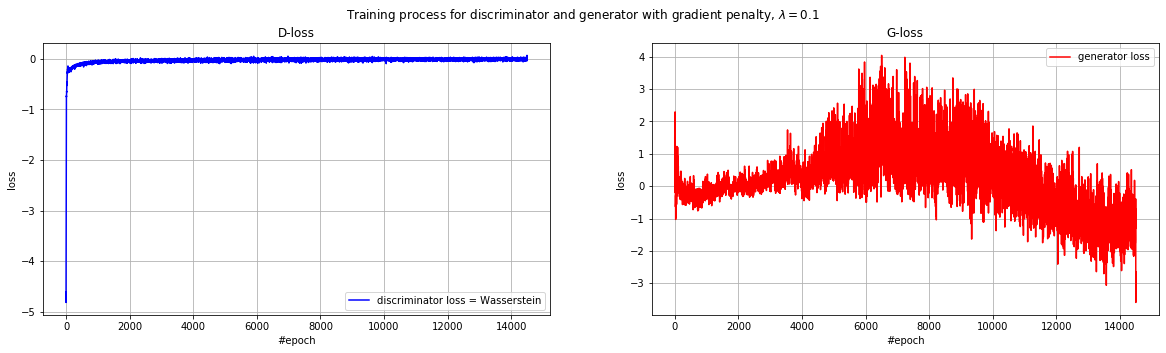

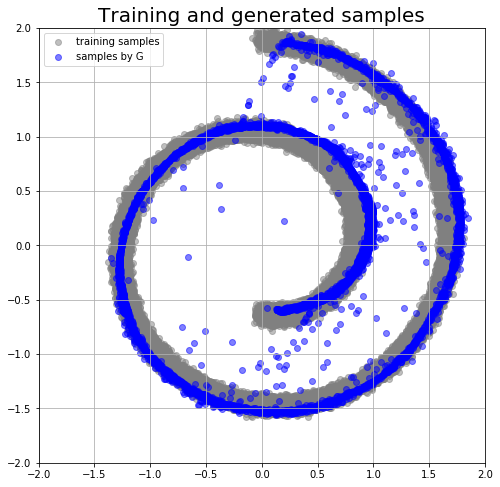

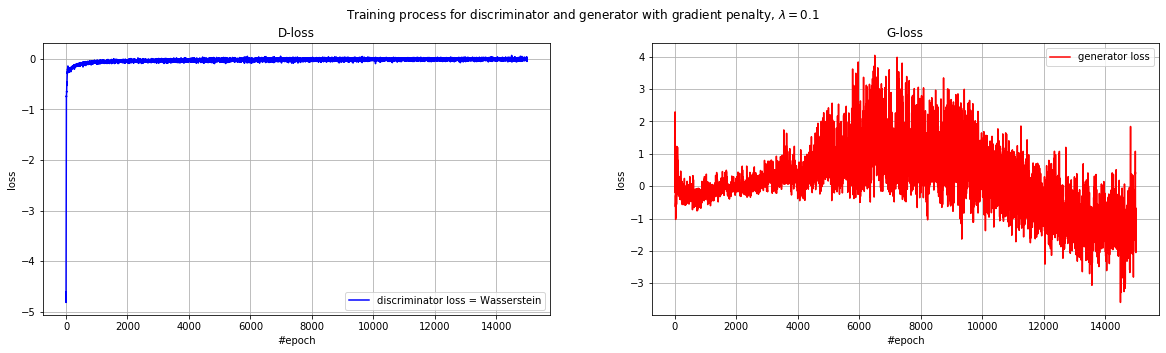

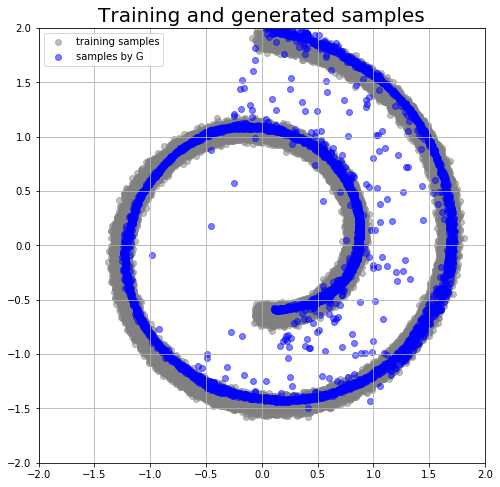

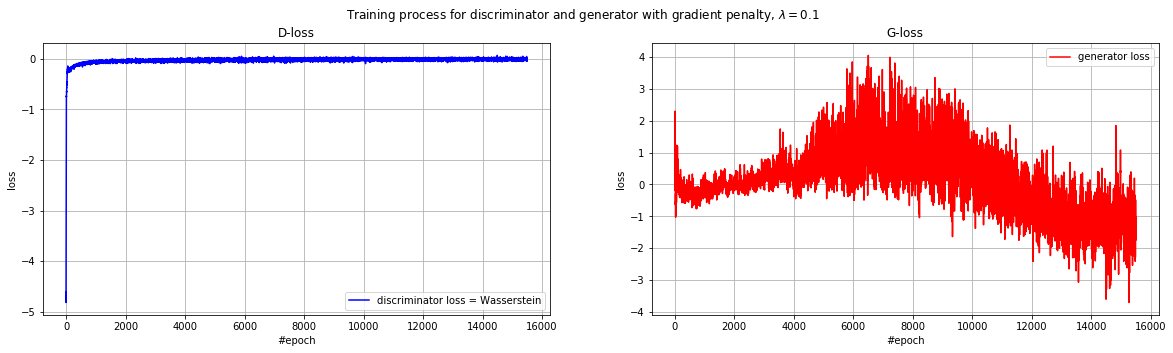

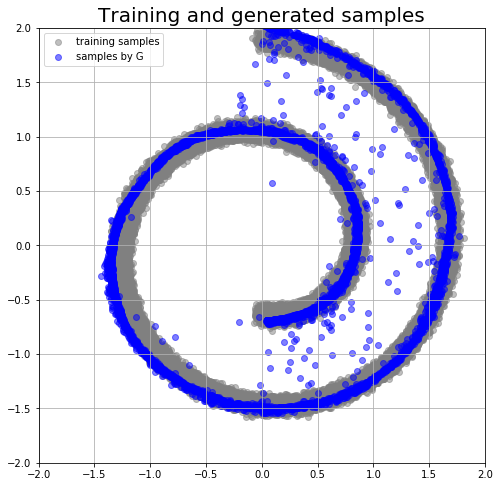

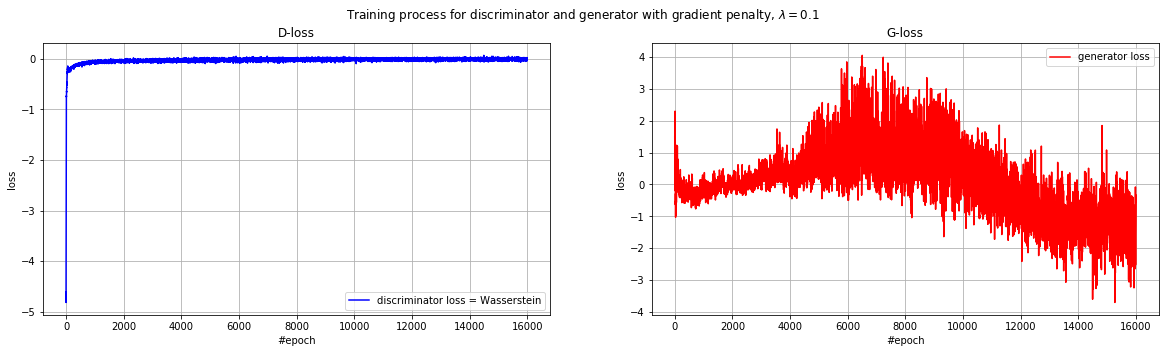

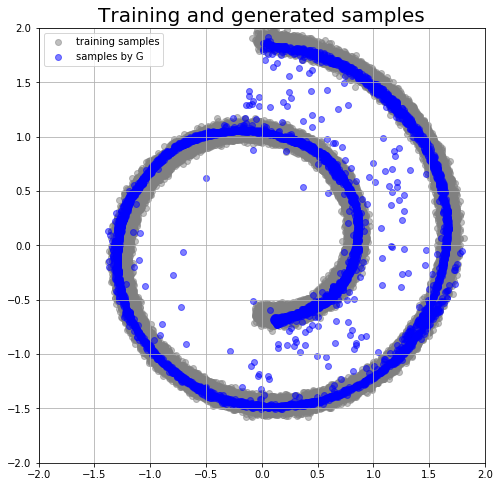

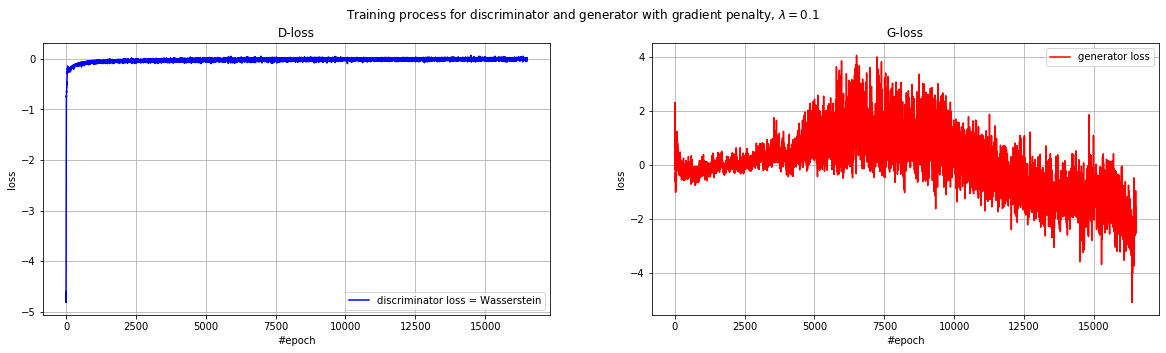

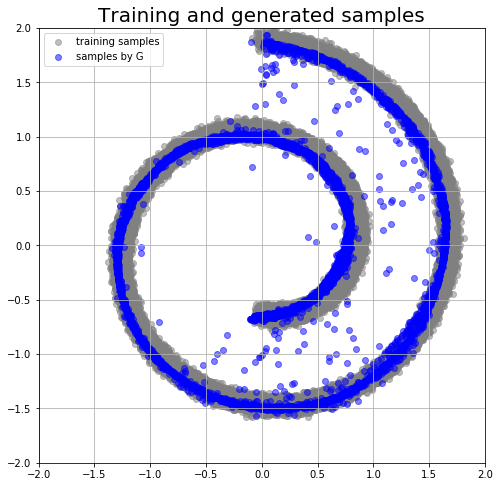

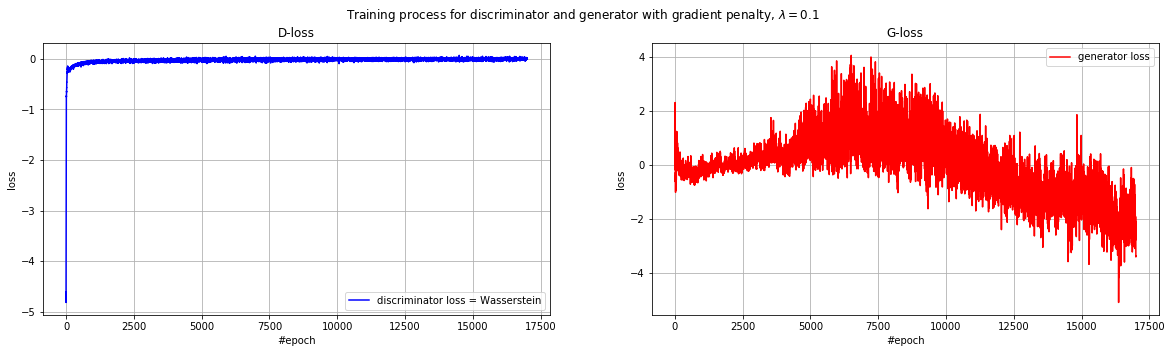

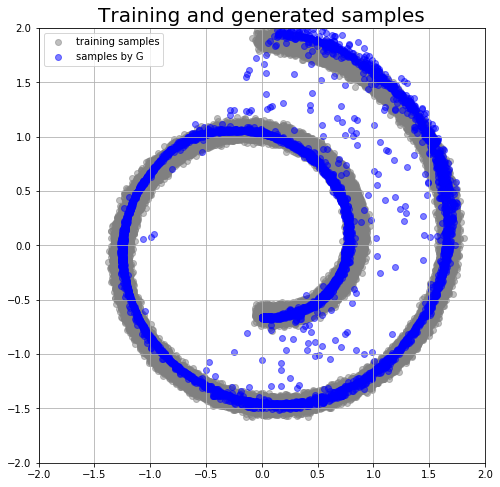

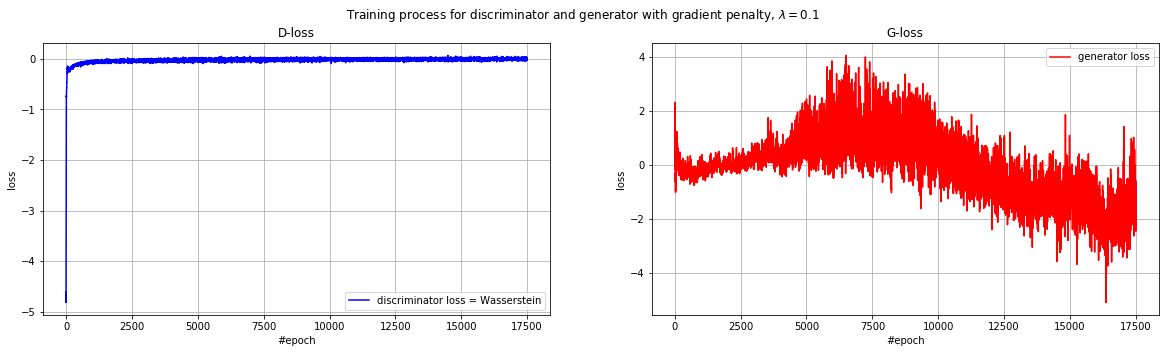

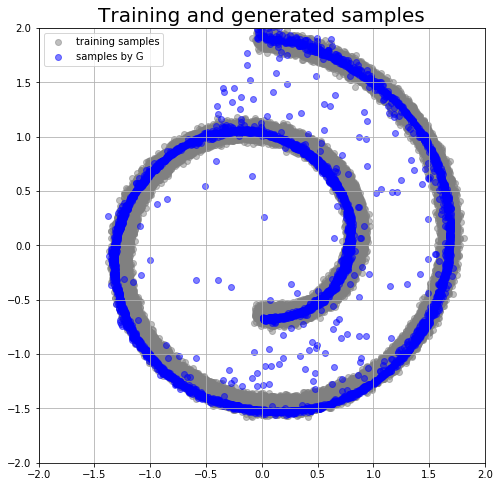

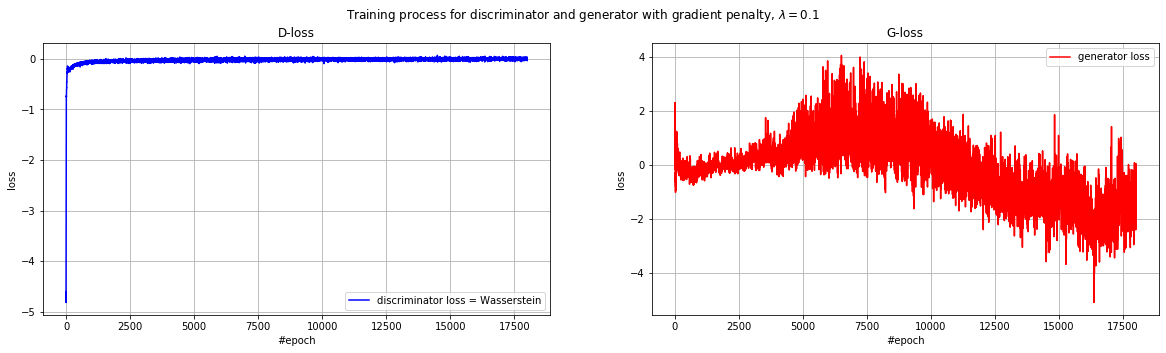

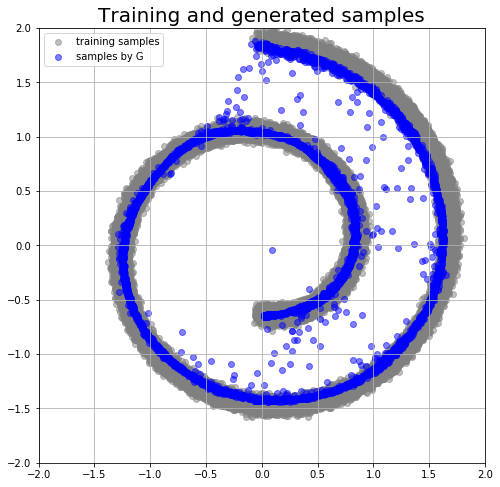

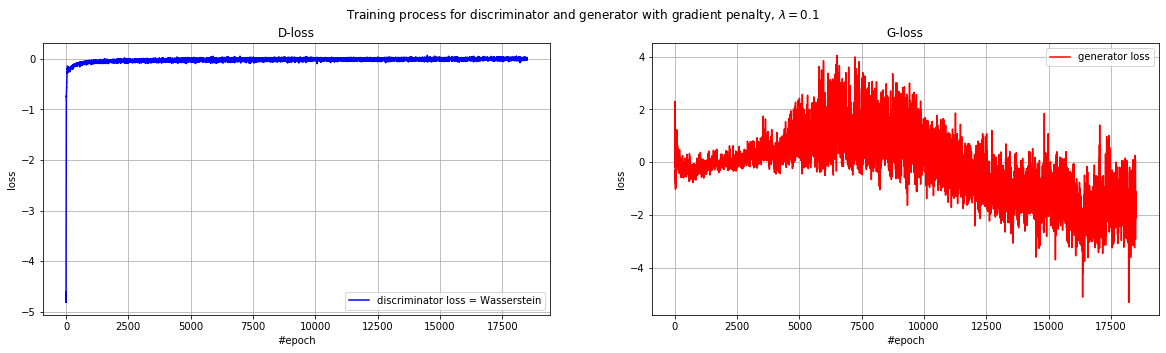

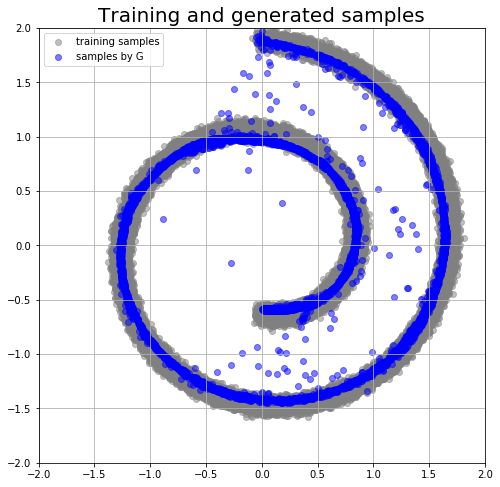

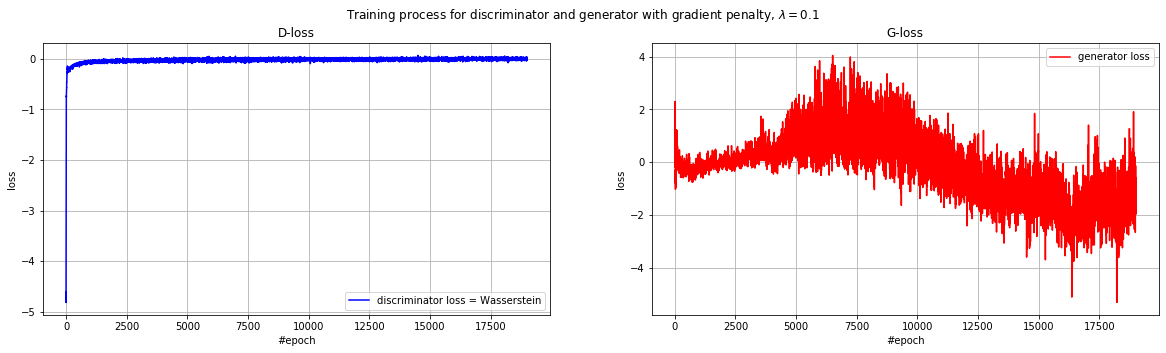

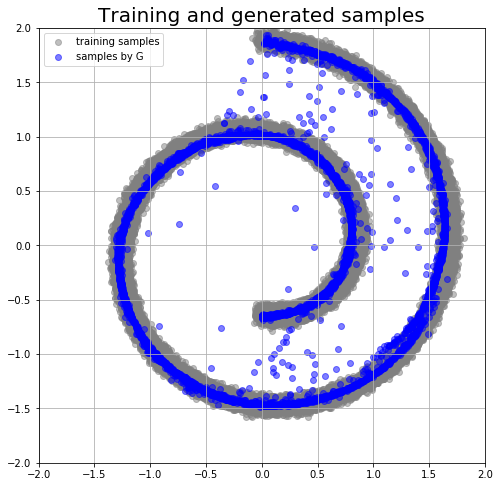

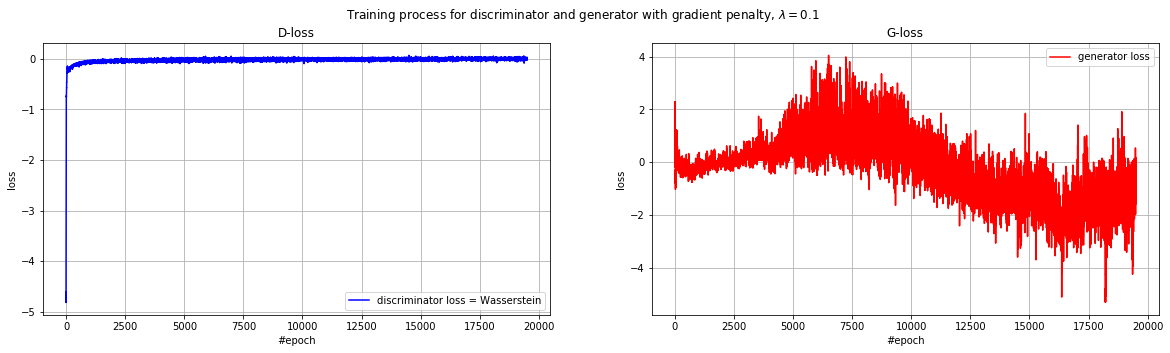

In [7]:
print("Start to train WGAN")
train_wgan(X_train,
           X_train_batches, 
           G, g_optimizer, 
           D, d_optimizer,
           path_to_save,
           BATCH_SIZE,
           device,
           use_gradient_penalty,
           Lambda,
           num_epochs,
           num_epoch_for_print,
           num_epoch_for_save,
           batch_size_sample)

#### We can see train generated sample and learning curves

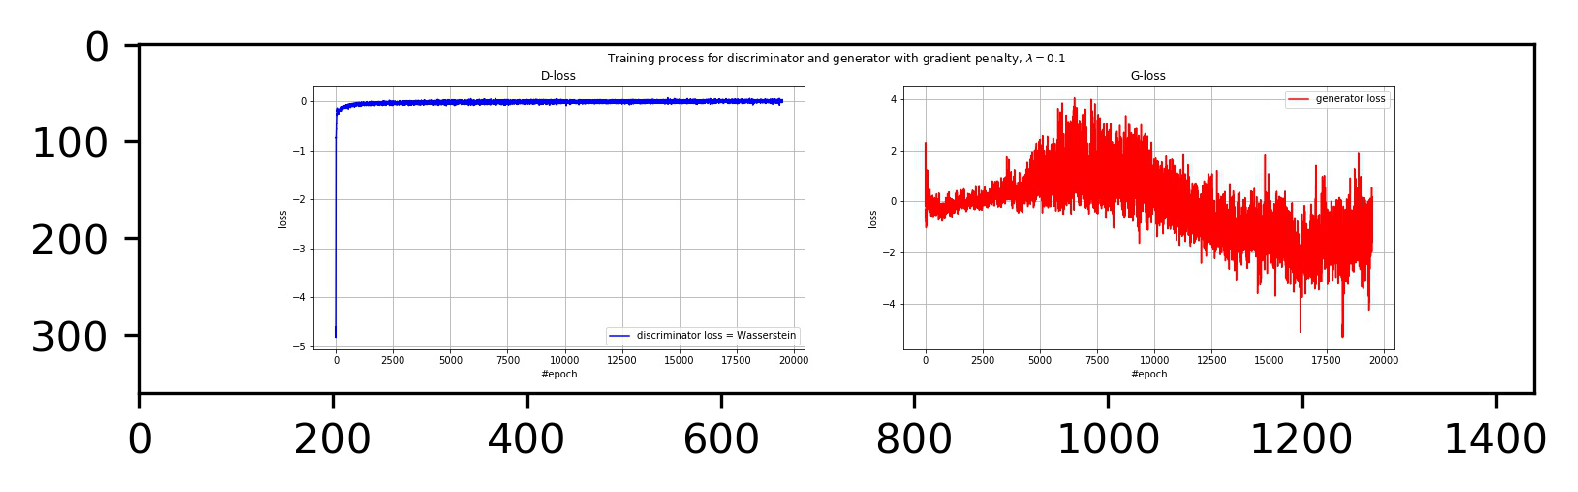

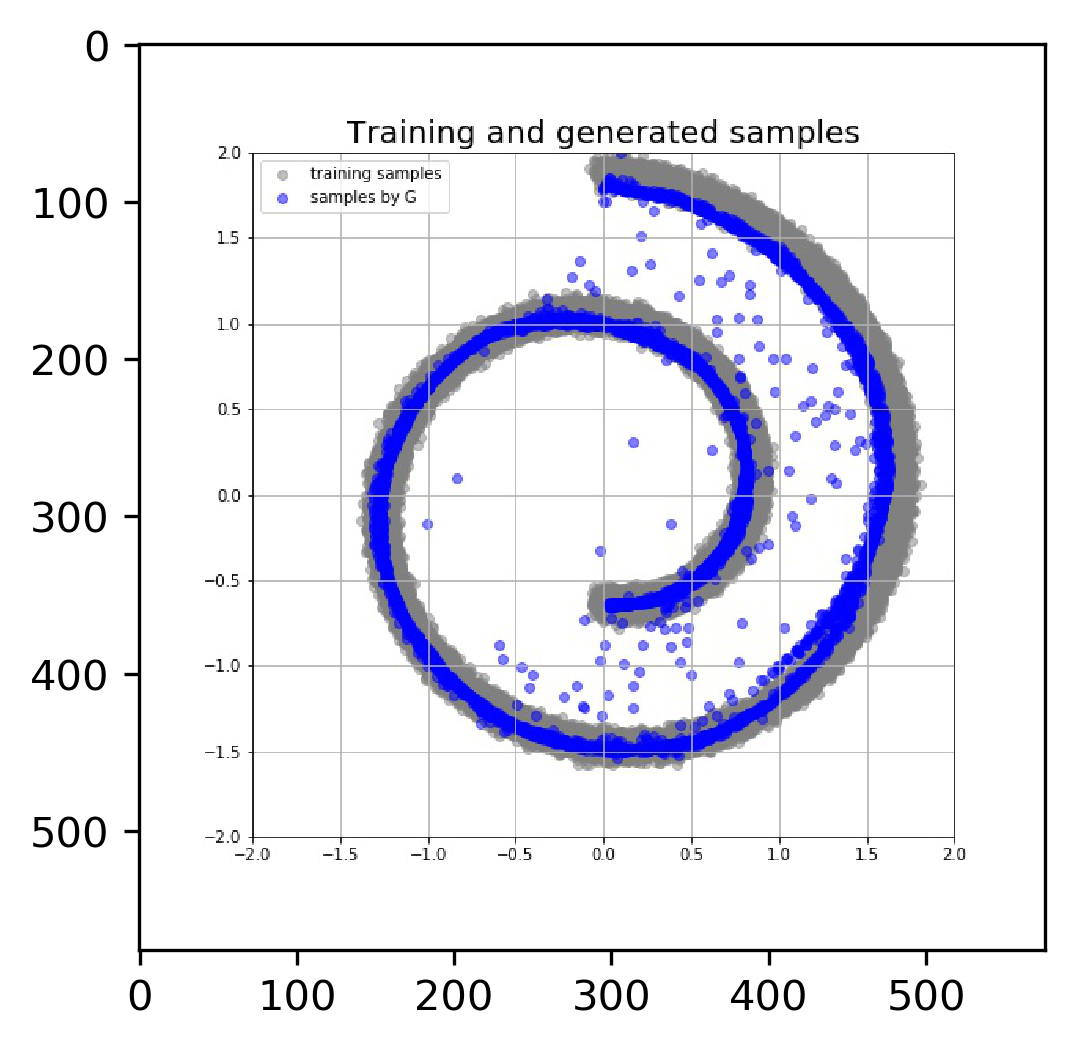

In [30]:
plt.figure(dpi=300)
img = mpimg.imread('./plots/2021_12_20-22_59_07_wgan_losses_19500_epoch.jpg')
imgplot = plt.imshow(img)
plt.show()

plt.figure(dpi=300)
img = mpimg.imread('./plots/2021_12_20-22_59_07_wgan_sampling_19500_epoch.jpg')
imgplot = plt.imshow(img)
plt.savefig('wgan_sampling.png')
plt.show()

In [32]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [33]:
z_dim = 2
G = Generator_fully_connected(n_dim = 2).to(device)
D = Discriminator_fully_connected().to(device)

In [34]:
print("Load models")
path_to_swissroll_data_generator = "./models/2021_12_20-22_59_08_generator.pth"
path_to_swissroll_data_discriminator = "./models/2021_12_20-22_59_08_discriminator.pth"

Load models


In [51]:
G.load_state_dict(torch.load(path_to_swissroll_data_generator))
D.load_state_dict(torch.load(path_to_swissroll_data_discriminator))

<All keys matched successfully>

In [52]:
for p in D.parameters():  
    p.requires_grad = False
for p in G.parameters():  
    p.requires_grad = False

In [71]:
def sample_fake_data(generator, X_train, epoch, path_to_save, batch_size_sample = 5000):
    fake_data = generator.sampling(batch_size_sample).data.cpu().numpy()
    plt.figure(figsize=(8, 8))
    plt.xlim(-2., 2.)
    plt.ylim(-2., 2.)
    plt.title("Training and generated samples", fontsize=20)
    plt.scatter(X_train[:,:1], X_train[:,1:], alpha=0.5, color='gray', 
                marker='o', label = 'training samples')
    plt.scatter(fake_data[:,:1], fake_data[:,1:], alpha=0.5, color='blue', 
                marker='o', label = 'samples by G')
    plt.legend()
    plt.grid(True)
    plt.savefig(path_to_save)
    plt.show()

#### Let's start with generation of 1000 points

In [57]:
batch_size_sample = 1000

In [72]:
title = f"Training and generated samples, num samples = {batch_size_sample}"
mode = f"swissroll_data"

fake_data = G.sampling(batch_size_sample).data.cpu().numpy()
generated_fake_data = fake_data
path_to_save_plots = os.path.join(path_to_save, 'plots')

print("Start to sample from simple generator")
epoch=19500
sample_fake_data(G, X_train, epoch, f'plots2/{mode}.png', batch_size_sample)

Start to sample from simple generator


#### Now let's use DDLS method. We initialize 1000 points from the normal distribution and iterate 100 times. Empirically, the best results we got on a 36th iteration. A total of 1000 chains of length 36. We made an additional samplings with $\epsilon$ = [1e-2, 1e-3, 1e-4, 1e-5] and calculated EMD metric.

In [40]:
from tqdm import tqdm
from torch.distributions import MultivariateNormal, Normal, Independent, Uniform

def new_langevin_sampling(generator, discriminator, z_dim, eps, num_iter, batch_size_sample, device):
    cur_z_arr = []
    for i in range(0, batch_size_sample):
        loc = torch.zeros(z_dim).to(device)
        scale = torch.ones(z_dim).to(device)
        normal = Normal(loc, scale)
        diagn = Independent(normal, 1)
        cur_z = diagn.sample()
        cur_z_arr.append(cur_z.clone())
    cur_z_arr = (torch.stack(cur_z_arr, dim = 0))
    cur_z_arr.requires_grad_(True)
    latent_arr = [cur_z_arr.clone()]

    for i in tqdm(range(num_iter - 1)):
        GAN_part = -discriminator(generator(cur_z_arr))
        latent_part = -diagn.log_prob(cur_z_arr)
        for j in range(batch_size_sample):
            energy = GAN_part[j] + latent_part[j]
            energy.backward(retain_graph = True)
            with torch.no_grad():
                noise = diagn.sample()
                cur_z_arr[j] -= (0.5*eps*(cur_z_arr.grad)[j] - (eps ** 0.5)*noise)
        latent_arr.append(cur_z_arr.clone())
    return latent_arr

In [41]:
eps_arr = [1e-2, 1e-3, 1e-4, 1e-5]
a = []
for i in range(len(eps_arr)):
    a.append(new_langevin_sampling(G, D, z_dim, 1e-4, 100, 1000, device))

100%|██████████| 99/99 [01:18<00:00,  1.27it/s]


In [74]:
def plot_fake_data(fake_data, X_train, eps, epoch, path_to_save, sampling_mode = 'Langevin'):
    plt.figure(figsize=(8, 8))
    plt.xlim(-2., 2.)
    plt.ylim(-2., 2.)
    title = fr"Training data and {sampling_mode} sampling, $\varepsilon$ = {eps}"
    plt.title(title, fontsize=20)
    plt.scatter(X_train[:,:1], X_train[:,1:], alpha=0.5, color='gray', 
                marker='o', label = 'training samples')
    plt.scatter(fake_data[:,:1], fake_data[:,1:], alpha=0.5, color='blue', 
                marker='o', label = 'samples by G')
    plt.legend()
    plt.grid(True)
    if path_to_save is not None:
    path_to_plot = path_to_save
    plt.savefig(path_to_plot)
    plt.show()

In [ ]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

from scipy.stats import wasserstein_distance

def sliced_wasserstein(X, Y, num_proj):
    dim = X.shape[1]
    ests = []
    for _ in range(num_proj):
        # sample uniformly from the unit sphere
        dirr = np.random.rand(dim)
        dirr /= np.linalg.norm(dirr)

        # project the data
        X_proj = X @ dirr
        Y_proj = Y @ dirr

        # compute 1d wasserstein
        ests.append(wasserstein_distance(X_proj, Y_proj))
    return np.mean(ests)

0.07640914860045973
0.06201675814929043
0.05303950004440619
0.10029566533887661
0.06915012598279131


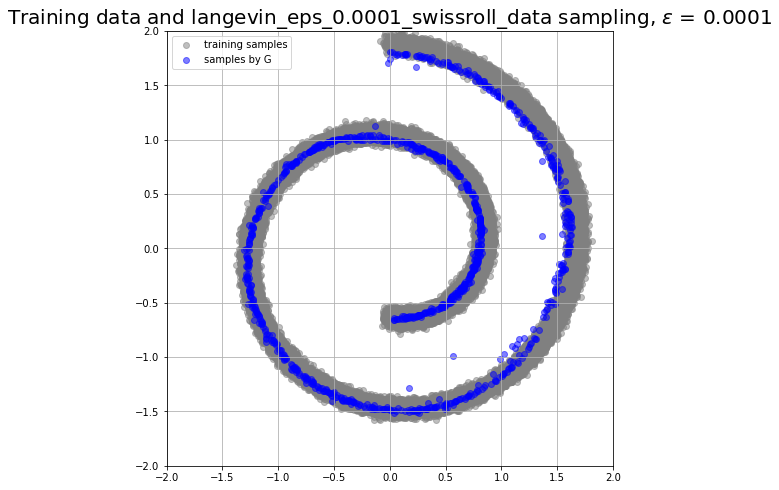

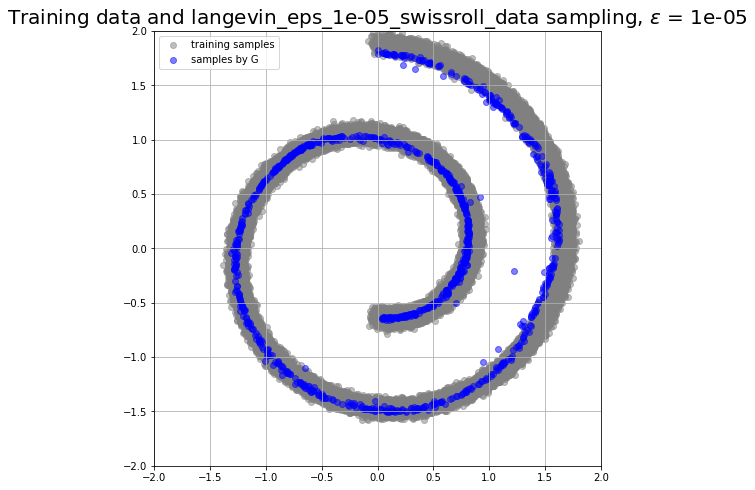

In [136]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
print(sliced_wasserstein(X_train[:1000], generated_fake_data , 2))
for it, eps in zip(a, eps_arr):
    fake_data = G(it[35]).data.cpu().numpy()
    print(sliced_wasserstein(X_train[:1000] , fake_data, 2))
    title = fr"Langevin sampling, $\varepsilon$ = {eps}, num samples = {batch_size_sample}"
    mode = f"langevin_eps_{eps}_swissroll_data"
    plot_fake_data(fake_data, X_train, eps, epoch, path_to_save=f'./{mode}.png', sampling_mode=mode)